In [9]:
from unet.datatset import TeethSegmentationDataset

root = "/home/mukesh/.cache/kagglehub/datasets/humansintheloop/teeth-segmentation-on-dental-x-ray-images/versions/1/Teeth Segmentation PNG/d2"
dataset = TeethSegmentationDataset(root=root, imgs_dir="img", masks_dir="masks_machine", target_size=((512, 256)))
img, mask = dataset.__getitem__(0)

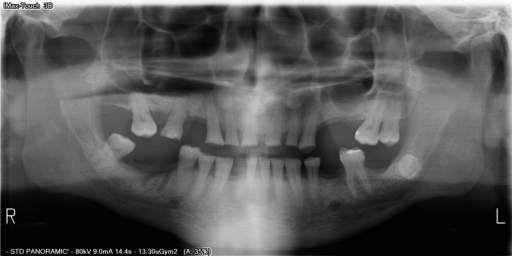

In [6]:
img

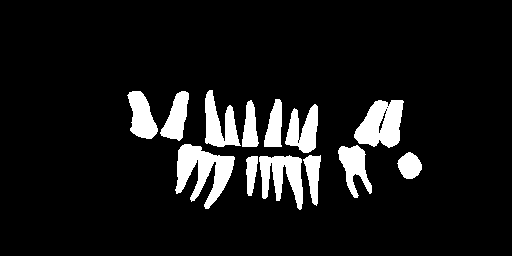

In [7]:
mask